# **Marketing Campaign - Car Company**



## Context


●	This project is to be applied in a marketing campaign for a car reseller company. The campaign is aimed at existing customers and the goal of the project is to help target potential buyers. The objective is to build a machine learning model that predicts which customers are more likely to re-buy a new car.


●	The results of the model will be used to decide which customers to contact in this campaign.

### 0. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from google.colab import drive #drive.mount('/content/drive')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
from sklearn.svm import SVC
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


### 1.   Load Dataset

In [2]:
file_url = 'https://drive.usercontent.google.com/u/0/uc?id=1I9YA9aI-Cnc_IsGjyKfD_PldX5nVMmR6&export=download'

In [3]:
df = pd.read_csv(file_url)

### 2. Explore Dataset

In [4]:
df

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10


In [5]:
df["Target"] = ["Yes" if x==1 else "No" for x in df["Target"]]

In [6]:
categorical_variables = ["Target","age_band","gender","car_model","car_segment"]
numerical_variables = ["age_of_vehicle_years",	"sched_serv_warr",	"non_sched_serv_warr",	"sched_serv_paid",	"non_sched_serv_paid",	"total_paid_services",	"total_services",	"mth_since_last_serv",	"annualised_mileage",	"num_dealers_visited",	"num_serv_dealer_purchased"]

df_categorical = df[categorical_variables]
df_numerical = df[numerical_variables]

### 3. Explore Target variable

In [7]:
df["Target"].value_counts()

,count
Target,
No,127816
Yes,3521


<ipython-input-52-b1564725a55a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


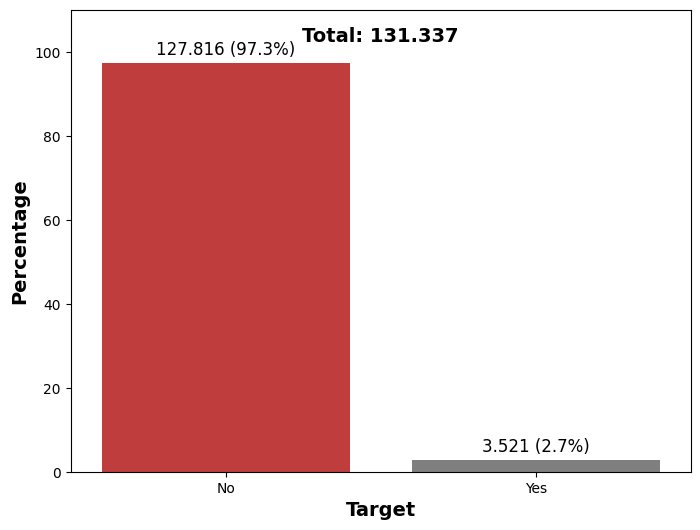

In [52]:
def single_category_vertical_bar_distribution(data, binary_variable, figsize=(8, 6)):
    # Calculate proportions for the binary variable
    proportions = data[binary_variable].value_counts(normalize=True) * 100
    counts = data[binary_variable].value_counts()  # Absolute counts

    # Define the red and grey colors
    colors = ['#d62728', '#7f7f7f']  # Red and Grey

    # Total count of the binary variable
    total_count = data[binary_variable].count()

    # Create a vertical bar plot
    plt.figure(figsize=figsize)
    sns.barplot(
        x=proportions.index,
        y=proportions.values,
        palette=colors  # Use the red and grey colors
    )

    # Annotate the bars with both percentages and counts
    for i, proportion in enumerate(proportions.values):
        formatted_count = f'{counts[proportions.index[i]]:,.0f}'.replace(',', '.')  # Thousands separator
        plt.text(
            i,  # x-position at the bar's base
            proportion + 2,  # Slightly above the bar
            f'{formatted_count} ({proportion:.1f}%)',
            color='black',
            fontsize=12,
            ha='center'
        )

    # Display total count on top of the plot
    plt.text(
        0.5,  # Position it in the middle
        max(proportions.values) + 5,  # Slightly above the highest bar
        f'Total: {total_count:,.0f}'.replace(',', '.'),
        ha='center',
        fontsize=14,
        fontweight='bold',
        color='black'
    )

    # Add labels, but remove the title
    plt.xlabel(binary_variable, fontsize=14, fontweight='bold')
    plt.ylabel('Percentage', fontsize=14, fontweight='bold')

    plt.ylim(0, 110)  # To give space for the annotations above the bars
    plt.show()

# Example usage
single_category_vertical_bar_distribution(df, "Target")


In [9]:
target_counts = df["Target"].value_counts()
print("Target is a {:.2f} % of the total".format(target_counts.iloc[1] / (target_counts.iloc[0] + target_counts.iloc[1]) * 100))

Target is a 2.68 % of the total


### 4. Explore Variables of Interest

####Categorical

In [10]:
print(df.isna().sum())

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64


"age_band" and "gender" have many NaN values.

In [11]:
print(df.dtypes)

ID                            int64
Target                       object
age_band                     object
gender                       object
car_model                    object
car_segment                  object
age_of_vehicle_years          int64
sched_serv_warr               int64
non_sched_serv_warr           int64
sched_serv_paid               int64
non_sched_serv_paid           int64
total_paid_services           int64
total_services                int64
mth_since_last_serv           int64
annualised_mileage            int64
num_dealers_visited           int64
num_serv_dealer_purchased     int64
dtype: object


In [12]:
df2 = df.copy()  # Create a copy of the original df

# Replace the string "NaN" with "Unknown" in 'age_band' and 'gender' columns
df2["age_band"] = df2["age_band"].replace("NaN", "Unknown")
df2["gender"] = df2["gender"].replace("NaN", "Unknown")

# Convert all object dtype columns to string dtype
df2 = df2.apply(lambda col: col.astype('string') if col.dtype == 'object' else col)

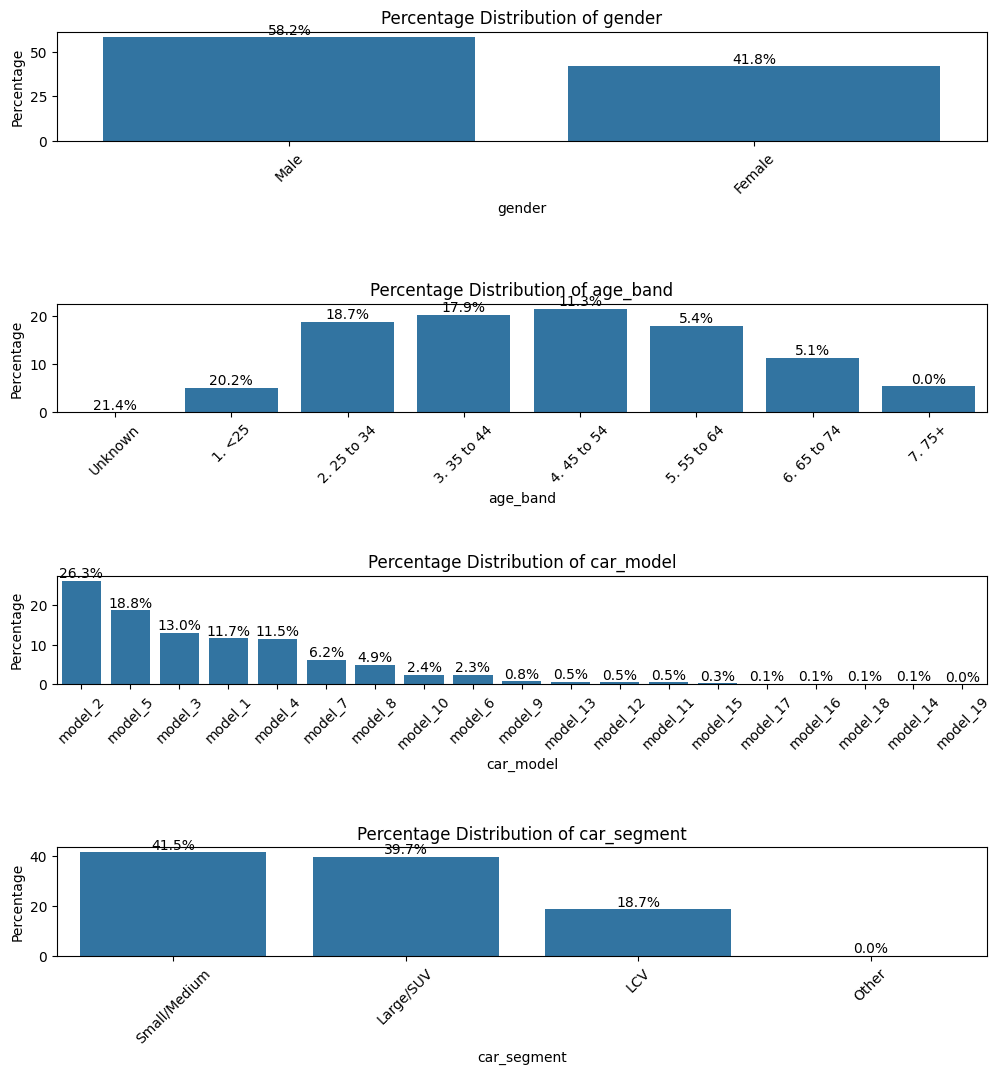

In [13]:
def plot_all_countplots(data, categorical_variables, size1=18, size2=18, filename='countplot_grid.png'):

    categorical_columns_length = len(categorical_variables)

    fig, axes = plt.subplots(categorical_columns_length, 1, figsize=(size1, size2))
    plt.subplots_adjust(hspace=1.5)  # Increase hspace for more vertical spacing

    for i, n in enumerate(categorical_variables):
        # If the column is 'age_band', set the desired order
        if n == 'age_band':
            age_band_order = ["Unknown", "1. <25", "2. 25 to 34", "3. 35 to 44", "4. 45 to 54", "5. 55 to 64", "6. 65 to 74", "7. 75+"]
            data[n] = pd.Categorical(data[n], categories=age_band_order, ordered=True)

        percentage_data = data[n].value_counts(normalize=True) * 100

        sns.barplot(x=percentage_data.index, y=percentage_data.values, ax=axes[i])

        axes[i].set_ylabel('Percentage')
        axes[i].set_xlabel(n)
        axes[i].set_title('Percentage Distribution of {}'.format(n))
        axes[i].tick_params(axis='x', labelrotation=45)
        for j, p in enumerate(axes[i].patches):
            axes[i].annotate('{:.1f}%'.format(percentage_data.values[j]),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', fontsize=10, color='black',
                             xytext=(0, 5), textcoords='offset points')

    plt.savefig(filename, bbox_inches='tight', dpi=300)  # Save the plot
    plt.show()

# Define the categorical variables list (excluding 'Target')
categorical_variables_ex_target = ["gender", "age_band", "car_model", "car_segment"]

# Call the function
plot_all_countplots(df2, categorical_variables_ex_target, size1=12, size2=12, filename='countplot_grid.png')


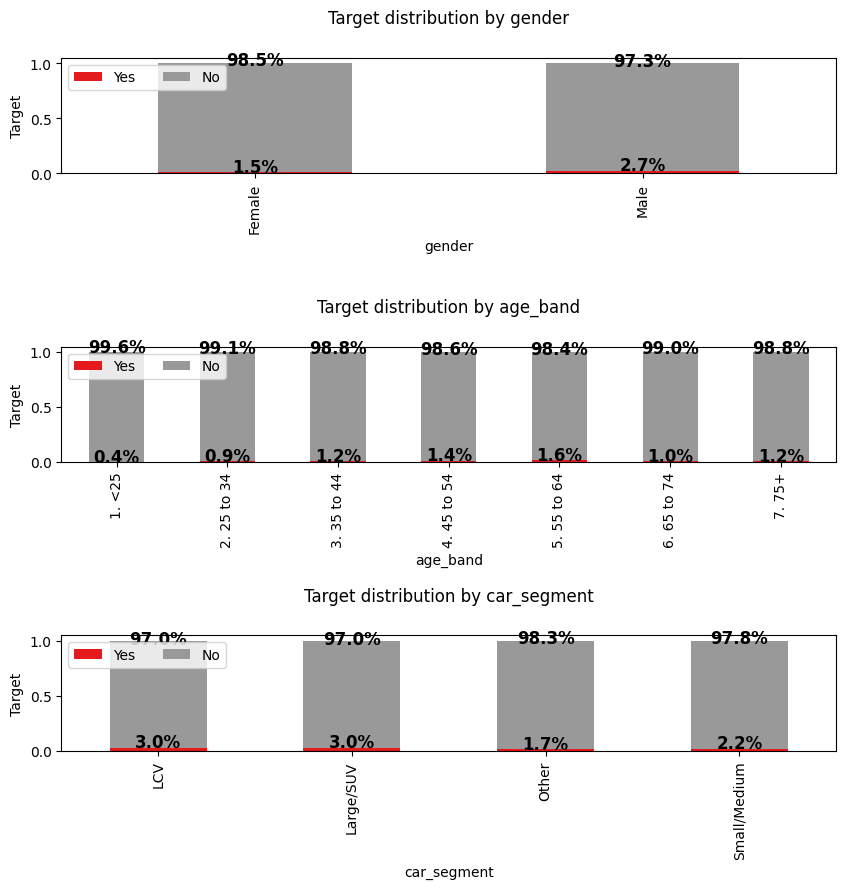

In [14]:
def distributions_binary_per_categories_grid(data, binary_variable, categorical_variables, figsize1=10, figsize2=3, hspace_value=1.0, title_pad=20, filename='distribution_grid.png'):
    # Setting up the plot grid
    num_vars = len(categorical_variables)
    fig, axes = plt.subplots(num_vars, 1, figsize=(figsize1, figsize2 * num_vars))
    plt.subplots_adjust(hspace=hspace_value)  # Adjusting space between plots

    for i, categorical_variable in enumerate(categorical_variables):
        cross_tab_prop = pd.crosstab(index=data[categorical_variable],
                                     columns=data[binary_variable],
                                     normalize="index")
        cross_tab_prop = cross_tab_prop.iloc[:, [1, 0]]  # Reversing the order

        cross_tab = pd.crosstab(index=data[categorical_variable],
                                columns=data[binary_variable])

        # Plotting the bar plot for each categorical variable
        cross_tab_prop.plot(kind='bar', stacked=True, colormap='Set1', ax=axes[i])

        # Customize the plot
        axes[i].legend(loc="upper left", ncol=2)
        axes[i].set_xlabel(categorical_variable)
        axes[i].set_ylabel(binary_variable)
        axes[i].set_title(f"{binary_variable} distribution by {categorical_variable}", pad=title_pad)  # Added padding to title

        # Adding percentage labels on the bars
        for n, x in enumerate([*cross_tab.index.values]):
            for proportion in cross_tab_prop.loc[x]:
                axes[i].text(
                    x=n,
                    y=proportion,
                    s=f'{np.round(proportion * 100, 1)}%',
                    color="black",
                    fontsize=12,
                    fontweight="bold",
                    ha='center'
                )

    # Save the plot as a PNG file
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()

categorical_variables_ex_carmodel = ["gender", "age_band", "car_segment"]
distributions_binary_per_categories_grid(df2, "Target", categorical_variables_ex_carmodel, hspace_value=1.5, title_pad=25, filename='distribution_grid.png')

####Numerical

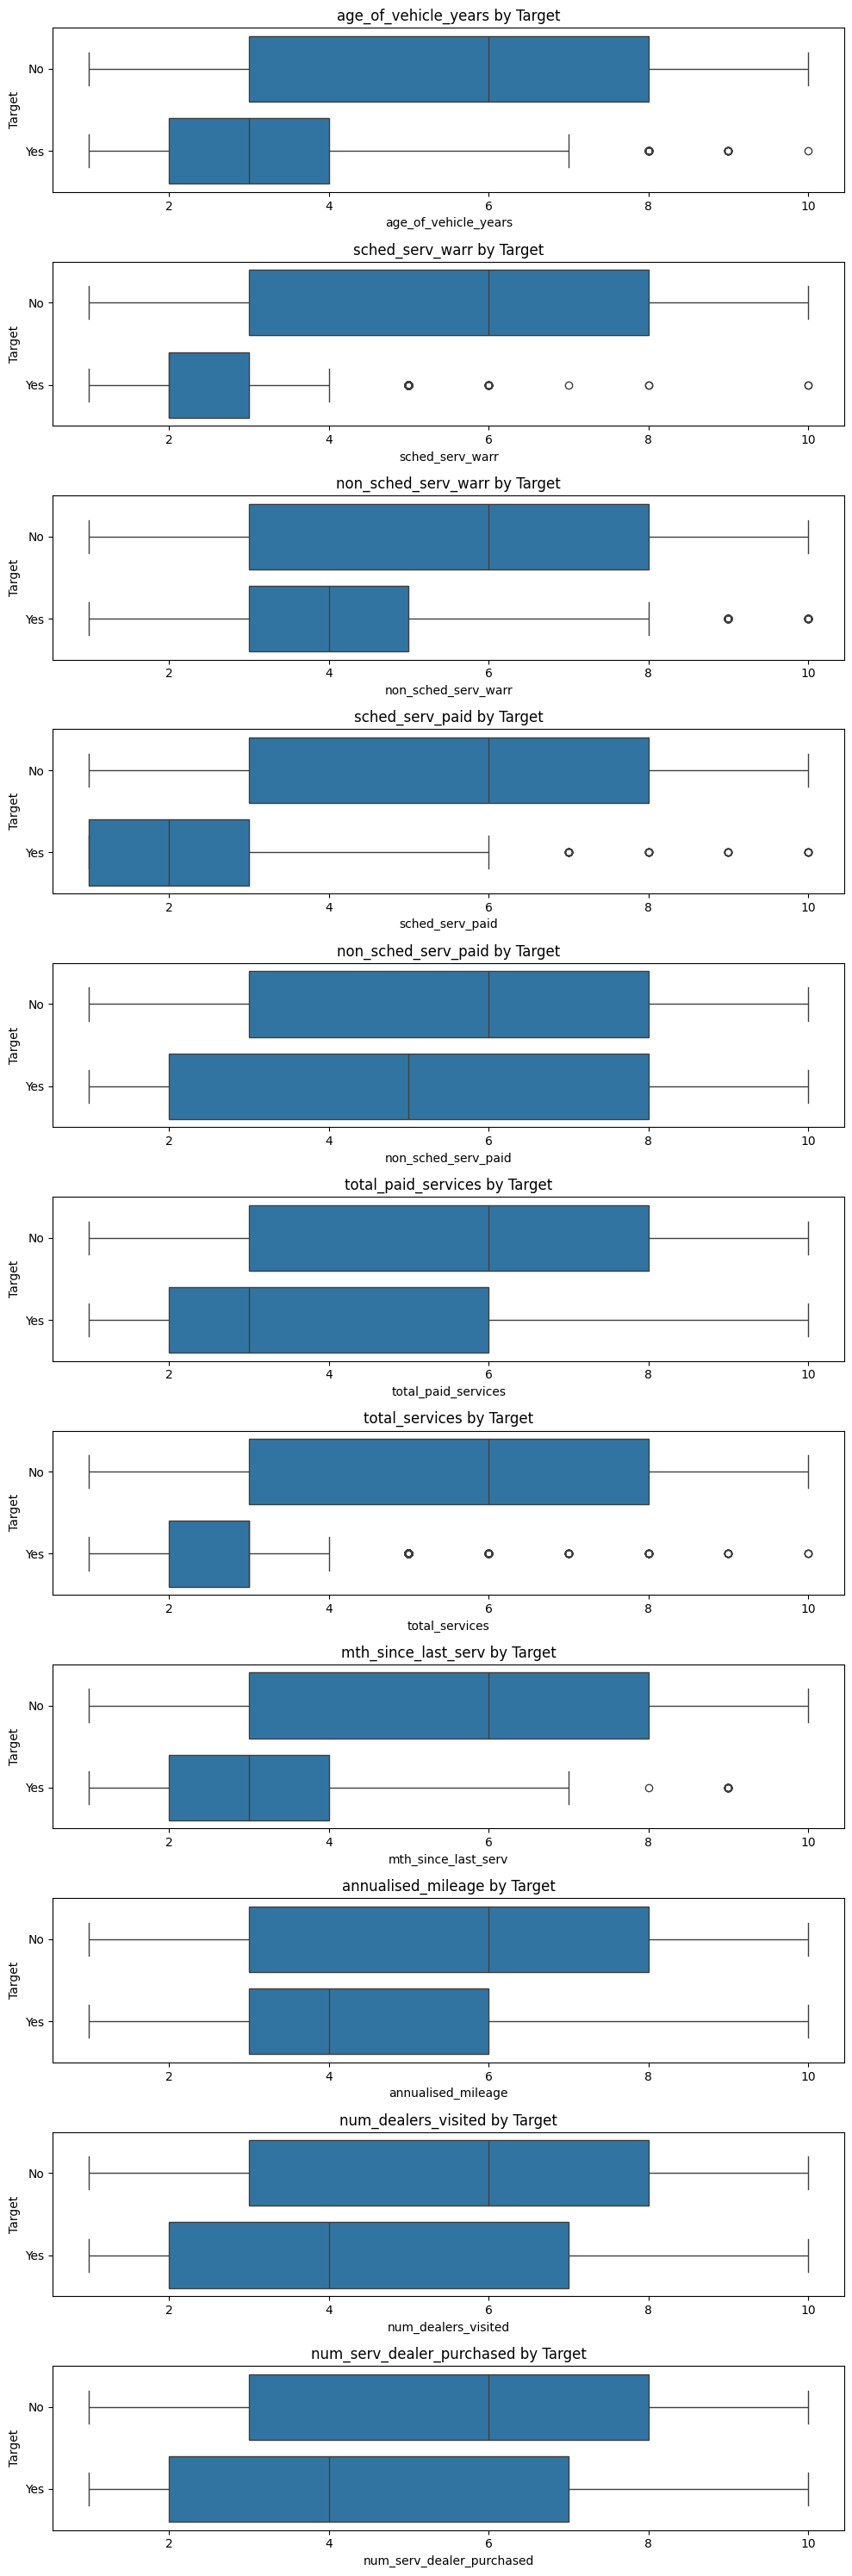

In [15]:
# Setting up the plot grid
fig, axes = plt.subplots(11,1, figsize=(10,30))

# Loop through predictor variables
for i, predictor in enumerate(df_numerical):

    sns.boxplot(y=df["Target"], x=df[predictor], ax=axes[i])
    axes[i].set_title(f'{predictor} by {"Target"}')

plt.tight_layout()
plt.show()

####Correlation

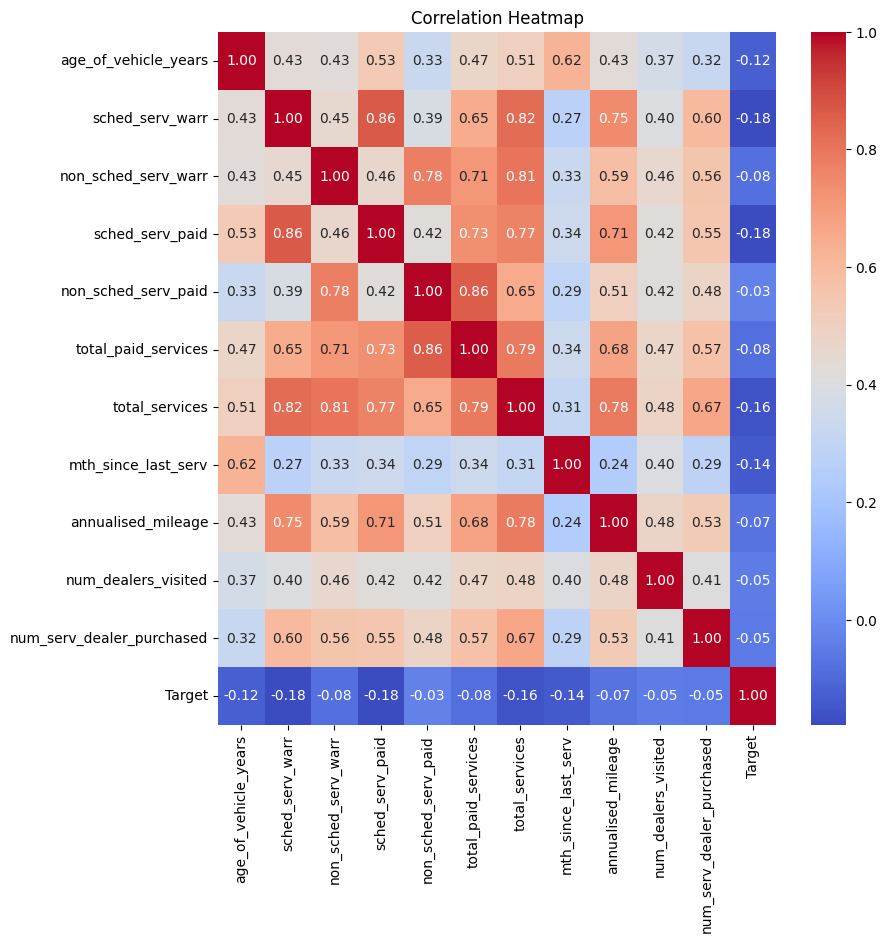

In [16]:
correlation_df = df_numerical.copy()
correlation_df["Target"] = [1 if x == "Yes" else 0 for x in df["Target"]]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')

# Save the image as a PNG file before showing it
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()


### 5. Prepare Data

#### NAN values

In [17]:
print(df.isna().sum())

ID                                0
Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64


There are only 2 columns that contain NaN values, "age_band" and "gender". Both columns contain too many NaN values (more than 50%), therefore we can't just erase those rows. Having a more detailed look into those columns I observe that both columns are categorical so I will leave the NaN values as an extra category "Unknown".

In [18]:
df["age_band"] = df["age_band"].fillna("Unknown")
df["gender"] = df["gender"].fillna("Unknown")

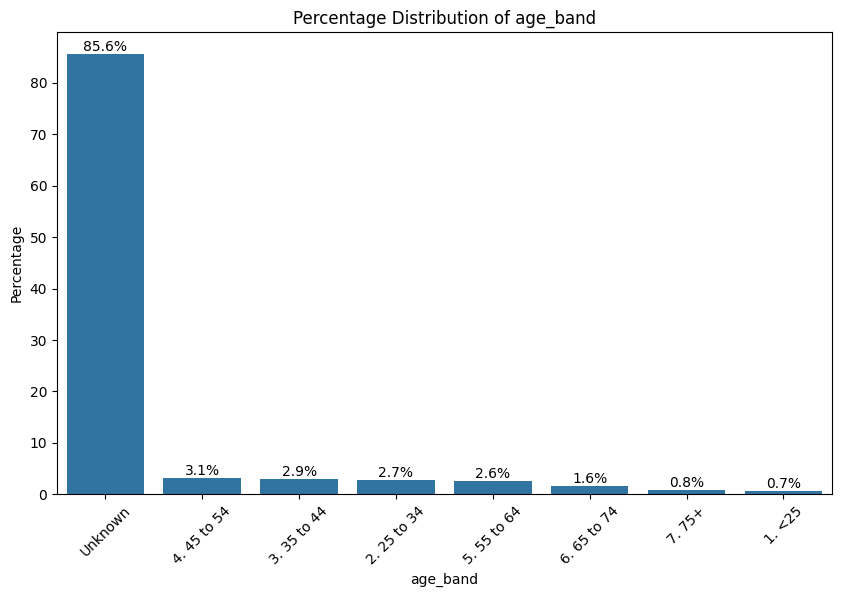

In [19]:
def plot_countplot(data, variable):

    percentage_data = data[variable].value_counts(normalize=True) * 100

    # Plot countplot with percentage on y-axis
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percentage_data.index, y=percentage_data.values)
    plt.ylabel('Percentage')
    plt.xlabel(variable)
    plt.title('Percentage Distribution of {}'.format(variable))
    plt.xticks(rotation=45)
    for i, p in enumerate(ax.patches):
      ax.annotate('{:.1f}%'.format(percentage_data.values[i]), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
    plt.show()

plot_countplot(df, "age_band")

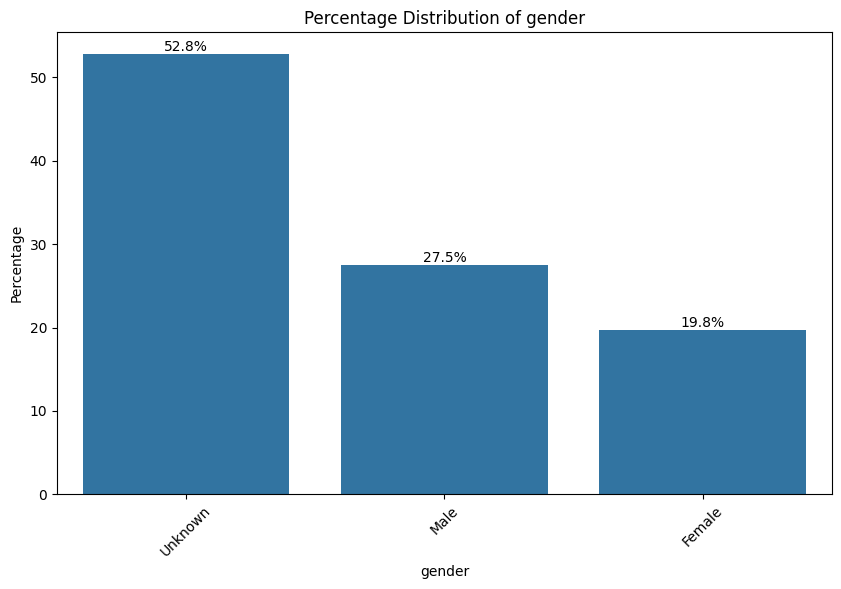

In [20]:
plot_countplot(df, "gender")

#### Duplicates

In [21]:
df[df["ID"].duplicated()]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased


Since we have an ID column, we can check that there are no duplicated rows. Now we can also drop the ID column.

In [22]:
df = df.drop("ID", axis=1)

####Outliers

In [23]:
df_numerical.describe()

,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


I observe that all the numerical variables are in a scale from 1 to 10. So no unusual outliers.

In [24]:
for i,n in enumerate(df_categorical):
  print("\n")
  print(df_categorical[n].value_counts())
  print("\n")



Target
No     127816
Yes      3521
Name: count, dtype: int64




age_band
4. 45 to 54    4058
3. 35 to 44    3833
2. 25 to 34    3548
5. 55 to 64    3397
6. 65 to 74    2140
7. 75+         1019
1. <25          967
Name: count, dtype: int64




gender
Male      36072
Female    25957
Name: count, dtype: int64




car_model
model_2     34491
model_5     24674
model_3     17074
model_1     15331
model_4     15155
model_7      8167
model_8      6443
model_10     3215
model_6      3071
model_9       994
model_13      714
model_12      614
model_11      612
model_15      334
model_17      153
model_16      114
model_18      101
model_14       78
model_19        2
Name: count, dtype: int64




car_segment
Small/Medium    54553
Large/SUV       52120
LCV             24606
Other              58
Name: count, dtype: int64




No outliers on the categorical variables either

#### Transform "age_band" column

Transform "age_band" column into numerical column

In [25]:
df["age_band"].value_counts()

,count
age_band,
Unknown,112375
4. 45 to 54,4058
3. 35 to 44,3833
2. 25 to 34,3548
5. 55 to 64,3397
6. 65 to 74,2140
7. 75+,1019
1. <25,967


In [26]:
#Transform each category into the mean of that category. Unknown values into 0.

df["age_band"] = np.where(df["age_band"] == "1. <25", (25+18)/2, df["age_band"])
df["age_band"] = np.where(df["age_band"] == "2. 25 to 34", (34+25)/2, df["age_band"])
df["age_band"] = np.where(df["age_band"] == "3. 35 to 44", (44+35)/2, df["age_band"])
df["age_band"] = np.where(df["age_band"] == "4. 45 to 54", (54+45)/2, df["age_band"])
df["age_band"] = np.where(df["age_band"] == "5. 55 to 64", (64+55)/2, df["age_band"])
df["age_band"] = np.where(df["age_band"] == "6. 65 to 74", (74+65)/2, df["age_band"])
df["age_band"] = np.where(df["age_band"] == "7. 75+", (84+75)/2, df["age_band"])
df["age_band"] = np.where(df["age_band"] == "Unknown", 0, df["age_band"])

#change into numerical column
df['age_band'] = df['age_band'].astype(float)

#change 0 values into mean of the column. excluding 0 values
mean = df["age_band"][df["age_band"]!=0].mean()
df["age_band"] = np.where(df["age_band"] == 0, mean, df["age_band"])

#### Reduce the categories in the "car_model" column.

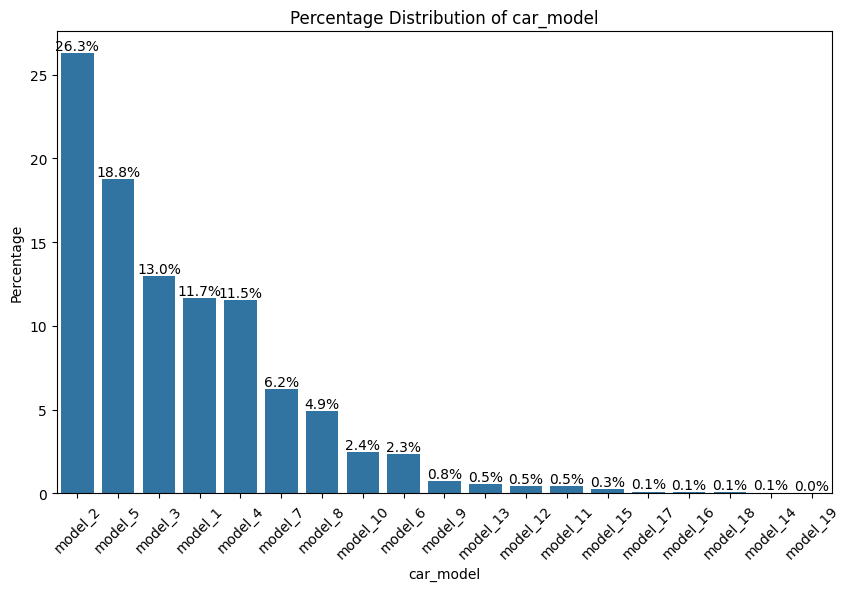

In [27]:
def plot_countplot(data, variable):

    percentage_data = data[variable].value_counts(normalize=True) * 100

    # Plot countplot with percentage on y-axis
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percentage_data.index, y=percentage_data.values)
    plt.ylabel('Percentage')
    plt.xlabel(variable)
    plt.title('Percentage Distribution of {}'.format(variable))
    plt.xticks(rotation=45)
    for i, p in enumerate(ax.patches):
      ax.annotate('{:.1f}%'.format(percentage_data.values[i]), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),textcoords='offset points')
    plt.show()

plot_countplot(df, "car_model")

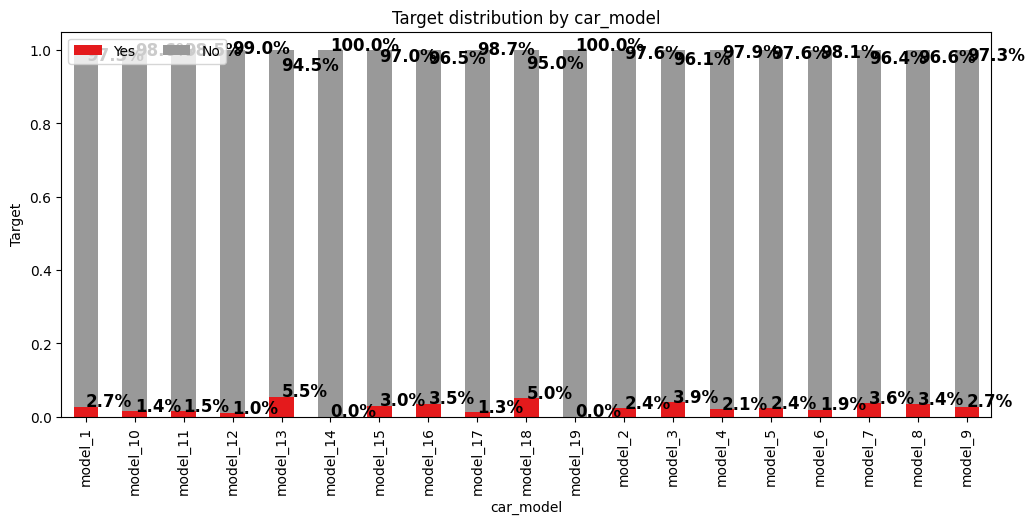

In [28]:
def distributions_binary_per_categories(data, binary_variable, categorical_variable, figsize1=12, figsize2=12):

    cross_tab_prop = pd.crosstab(index=data[categorical_variable],
                                columns=data[binary_variable],
                                normalize="index")
    cross_tab_prop = cross_tab_prop.iloc[:, [1,0]]

    cross_tab = pd.crosstab(index=data[categorical_variable],
                            columns=data[binary_variable])

    cross_tab_prop.plot(kind='bar',
                        stacked=True,
                        colormap='Set1',
                        figsize=(figsize1, figsize2))

    plt.legend(loc="upper left", ncol=2)
    plt.xlabel(categorical_variable)
    plt.ylabel(binary_variable)
    for n, x in enumerate([*cross_tab.index.values]):
        for proportion in cross_tab_prop.loc[x]:

            plt.text(x=n,
                    y=proportion,
                    s=f'{np.round(proportion * 100, 1)}%',
                    color="black",
                    fontsize=12,
                    fontweight="bold")
    plt.title(binary_variable+" distribution by "+categorical_variable)
    plt.show()

distributions_binary_per_categories(df, "Target", "car_model", figsize1=12 , figsize2=5)

As we can see in the first graphic above, there are many categories that have a very low number of ocurrencies. also, if we  focus on the latest graphic we see that the rate of "Target" values doesn't change that much between the different car_model categories. Therefore, I will group the lowest frequency categories in this variable. That way, the encoded dataframe will have less columns and therefore the models will run faster, without affecting the results.

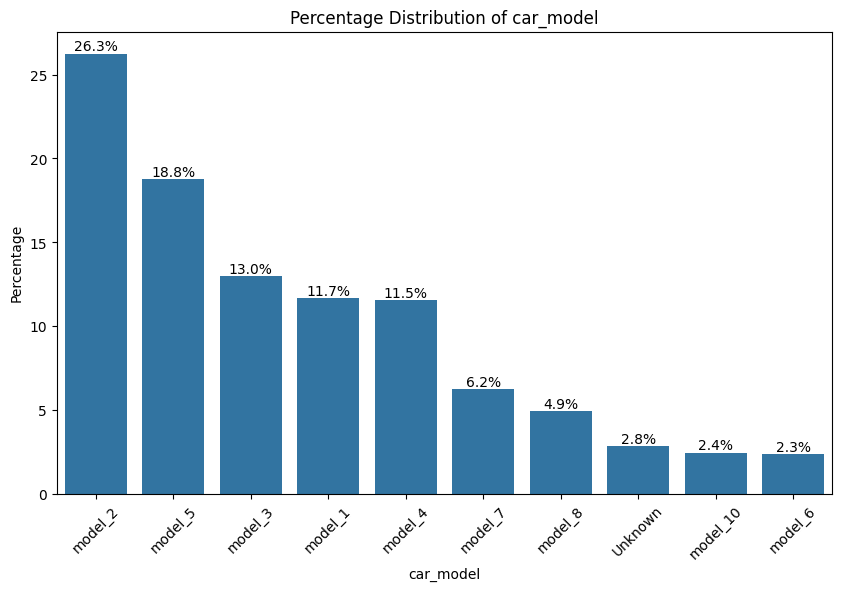

In [29]:
value_counts = df["car_model"].value_counts()

filtered_categories = value_counts[value_counts < 1000]

categories_below_1000 = filtered_categories.index.tolist()

df["car_model"] = [x if x not in categories_below_1000 else "Unknown" for x in df["car_model"]]

plot_countplot(df, "car_model")

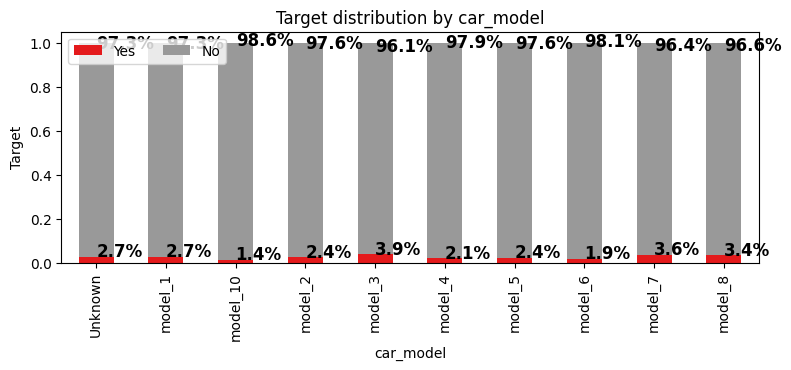

In [30]:
distributions_binary_per_categories(df, "Target", "car_model", figsize1=9 , figsize2=3)

####Encoding

In [31]:
categorical_variables = df_categorical.columns
categorical_variables = categorical_variables.drop("Target")

#Initiate encoder
encoder = OneHotEncoder(drop="first")

encoded_df= encoder.fit_transform(df[categorical_variables])

#encoded df
one_hot_df = pd.DataFrame(encoded_df.toarray(), columns=encoder.get_feature_names_out())

# Reset indexes
df_for_encoding = df.reset_index(drop=True)
one_hot_df = one_hot_df.reset_index(drop=True)

#combine with original df
combined_data = pd.concat([df_for_encoding, one_hot_df], axis=1)

#Drop original categorical columns
df_encoded = combined_data.drop(categorical_variables, axis=1)

In [32]:
df_encoded["Target"] = [1 if x=="Yes" else 0 for x in df_encoded["Target"]]

### 6. Split Dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop("Target", axis=1), df_encoded["Target"], test_size=0.2, random_state=42)

####Oversampling

In [34]:
def over_sampling_SMOTEENN(X_train, y_train):
    smote_enn = SMOTEENN(random_state=42)
    X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

    return X_train_resampled, y_train_resampled

X_train_resampled, y_train_resampled = over_sampling_SMOTEENN(X_train, y_train)

#### Normalization

#####Imbalanced data

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Balanced data

In [36]:
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler.transform(X_test)

### 7. Baseline Model

#### Baseline model 1

In [37]:
print(len(y_test))

26268


In [38]:
# Define probabilities for generating 1s and 0s
probabilities = [0.0268, 0.9732]  # Probability of generating 1 and 0, respectively

# Specify the size of the array
array_size = (26268,)  # Adjust the size of the array as needed

# Generate the array with 1s and 0s based on the specified probabilities
y_central = np.random.choice([1, 0], size=array_size, p=probabilities)

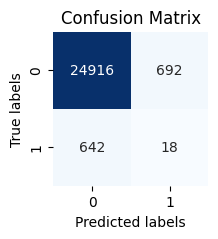

In [39]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_central)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Generate classification report
report = classification_report(y_test, y_central)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25608
           1       0.03      0.03      0.03       660

    accuracy                           0.95     26268
   macro avg       0.50      0.50      0.50     26268
weighted avg       0.95      0.95      0.95     26268



#### Baseline model 2

In [41]:
# Define probabilities for generating 1s and 0s
probabilities2 = [0.5, 0.5]  # Probability of generating 1 and 0, respectively

# Specify the size of the array
array_size2 = (26268,)  # Adjust the size of the array as needed

# Generate the array with 1s and 0s based on the specified probabilities
y_central2 = np.random.choice([1, 0], size=array_size2, p=probabilities2)

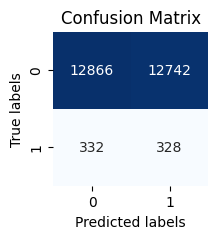

In [42]:
# Compute confusion matrix
cm2 = confusion_matrix(y_test, y_central2)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(2,2))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Generate classification report
report2 = classification_report(y_test, y_central2)

# Print the classification report
print("Classification Report:")
print(report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.50      0.66     25608
           1       0.03      0.50      0.05       660

    accuracy                           0.50     26268
   macro avg       0.50      0.50      0.36     26268
weighted avg       0.95      0.50      0.65     26268



### 8. Train Machine Learning Model

#### Imbalanced data

In [44]:
def Catboost(X_train_scaled, y_train, X_test_scaled, y_test):

    # Initialize CatBoostClassifier
    model = CatBoostClassifier()

    # Define the grid of hyperparameters to search
    param_grid = {
        'iterations': [100, 200],  # Number of trees (boosting iterations)
        'learning_rate': [0.1, 0.01],  # Learning rate (shrinkage)
        'depth': [6, 8],  # Depth of each tree
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='recall', verbose=2)

    # Fit the grid search to the data
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Cross-Validation Score:", best_score)

    # Make predictions on the testing data using the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Set Score:", accuracy)

    return grid_search

grid_search = Catboost(X_train_scaled, y_train, X_test_scaled, y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0:	learn: 0.5003134	total: 66.7ms	remaining: 6.6s
1:	learn: 0.3663769	total: 84.7ms	remaining: 4.15s
2:	learn: 0.2627159	total: 102ms	remaining: 3.3s
3:	learn: 0.1942144	total: 120ms	remaining: 2.88s
4:	learn: 0.1570189	total: 138ms	remaining: 2.63s
5:	learn: 0.1187470	total: 172ms	remaining: 2.69s
6:	learn: 0.0999168	total: 190ms	remaining: 2.52s
7:	learn: 0.0826319	total: 207ms	remaining: 2.38s
8:	learn: 0.0712552	total: 225ms	remaining: 2.27s
9:	learn: 0.0646627	total: 242ms	remaining: 2.18s
10:	learn: 0.0588524	total: 259ms	remaining: 2.1s
11:	learn: 0.0538344	total: 281ms	remaining: 2.06s
12:	learn: 0.0496926	total: 298ms	remaining: 2s
13:	learn: 0.0467179	total: 316ms	remaining: 1.94s
14:	learn: 0.0446414	total: 333ms	remaining: 1.89s
15:	learn: 0.0426983	total: 351ms	remaining: 1.84s
16:	learn: 0.0409460	total: 369ms	remaining: 1.8s
17:	learn: 0.0394588	total: 388ms	remaining: 1.77s
18:	learn: 0.0377755	total: 407ms	rem

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0:	learn: 0.4869521	total: 65.1ms	remaining: 12.9s
1:	learn: 0.3296821	total: 120ms	remaining: 11.9s
2:	learn: 0.2431652	total: 156ms	remaining: 10.3s
3:	learn: 0.1920687	total: 213ms	remaining: 10.4s
4:	learn: 0.1524660	total: 265ms	remaining: 10.4s
5:	learn: 0.1195675	total: 320ms	remaining: 10.3s
6:	learn: 0.0953777	total: 381ms	remaining: 10.5s
7:	learn: 0.0816999	total: 421ms	remaining: 10.1s
8:	learn: 0.0720810	total: 462ms	remaining: 9.8s
9:	learn: 0.0658220	total: 498ms	remaining: 9.47s
10:	learn: 0.0584939	total: 554ms	remaining: 9.52s
11:	learn: 0.0551546	total: 598ms	remaining: 9.38s
12:	learn: 0.0511098	total: 668ms	remaining: 9.6s
13:	learn: 0.0477423	total: 730ms	remaining: 9.7s
14:	learn: 0.0448866	total: 772ms	remaining: 9.52s
15:	learn: 0.0427975	total: 808ms	remaining: 9.29s
16:	learn: 0.0406386	total: 869ms	remaining: 9.36s
17:	learn: 0.0391105	total: 930ms	remaining: 9.4s
18:	learn: 0.0379844	total: 997ms	remaining: 9.5s
19:	learn: 0.0370985	total: 1.06s	remaining: 

#### Balanced data

In [45]:
grid_search2 = Catboost(X_train_resampled_scaled, y_train_resampled, X_test_resampled_scaled, y_test)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0:	learn: 0.5229653	total: 64.4ms	remaining: 6.37s
1:	learn: 0.4143631	total: 109ms	remaining: 5.33s
2:	learn: 0.3418874	total: 152ms	remaining: 4.93s
3:	learn: 0.2881025	total: 197ms	remaining: 4.74s
4:	learn: 0.2498670	total: 241ms	remaining: 4.59s
5:	learn: 0.2230234	total: 289ms	remaining: 4.53s
6:	learn: 0.2040634	total: 342ms	remaining: 4.55s
7:	learn: 0.1829613	total: 386ms	remaining: 4.44s
8:	learn: 0.1621371	total: 432ms	remaining: 4.37s
9:	learn: 0.1489857	total: 479ms	remaining: 4.31s
10:	learn: 0.1404905	total: 530ms	remaining: 4.29s
11:	learn: 0.1337593	total: 572ms	remaining: 4.2s
12:	learn: 0.1247670	total: 620ms	remaining: 4.15s
13:	learn: 0.1127075	total: 670ms	remaining: 4.11s
14:	learn: 0.1057917	total: 720ms	remaining: 4.08s
15:	learn: 0.1004571	total: 769ms	remaining: 4.04s
16:	learn: 0.0963403	total: 810ms	remaining: 3.95s
17:	learn: 0.0915771	total: 855ms	remaining: 3.9s
18:	learn: 0.0867407	total: 901ms

### 9. Assess Model Performance

####Imbalanced data

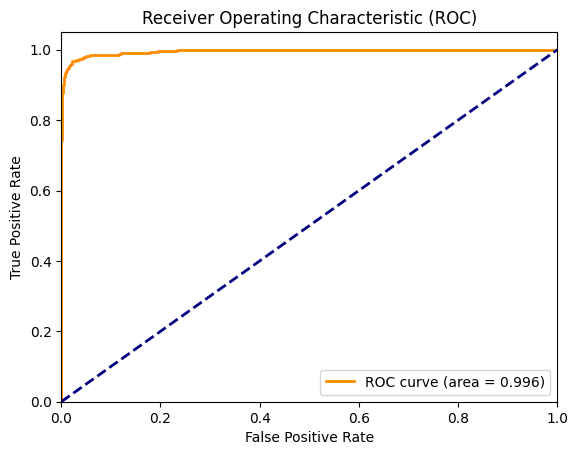

In [46]:
y_pred = grid_search.predict(X_test_scaled)

y_score = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

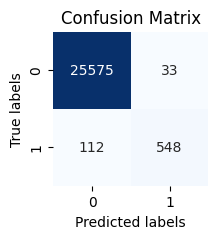

In [47]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25608
           1       0.94      0.83      0.88       660

    accuracy                           0.99     26268
   macro avg       0.97      0.91      0.94     26268
weighted avg       0.99      0.99      0.99     26268



####Balanced data

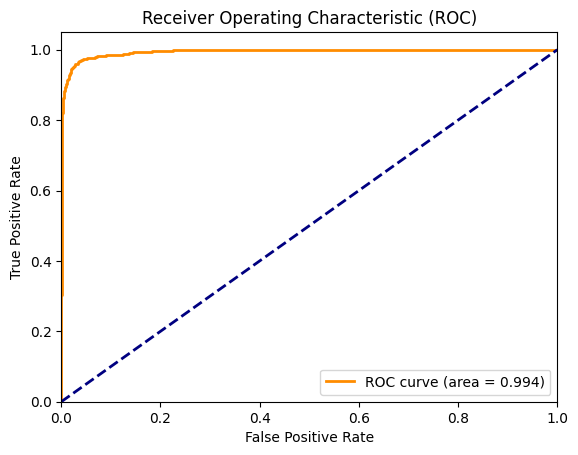

In [49]:
y_pred2 = grid_search2.predict(X_test_resampled_scaled)

y_score2 = grid_search2.best_estimator_.predict_proba(X_test_resampled_scaled)[:, 1]

# Compute ROC curve and ROC area for each class
fpr2, tpr2, _ = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curve
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Save the plot to a file
plt.savefig('roc_curve.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

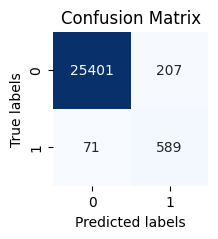

In [50]:
# Compute confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot to a file
plt.savefig('confusion_matrix.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

In [51]:
# Generate classification report
report2 = classification_report(y_test, y_pred2)

# Print the classification report
print("Classification Report:")
print(report2)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     25608
           1       0.74      0.89      0.81       660

    accuracy                           0.99     26268
   macro avg       0.87      0.94      0.90     26268
weighted avg       0.99      0.99      0.99     26268

